# Prova Intermediária - Machine Learning

**Nome do aluno**: <font color='red'>Luca Mizrahi</font>

Você deve submeter o trabalho via Blackboard. É de sua responsabilidade garantir que o arquivo correto foi enviado.

Se você precisou adicionar arquivos extras à essa prova, assegure-se de que você os está enviando também.

A prova é individual e com consulta. Faça o seu trabalho de maneira ética! Se você recebeu ajuda de sistemas de apoio inteligentes (por exemplo, ChatGPT, Bard, CoPilot, etc) DECLARE CLARAMENTE ONDE VOCÊ RECEBEU AJUDA para não configurar plágio (definido como "declarar como próprio o trabalho construido por outrem - neste caso um sistema computacional")

- [Contexto do problema](#Contexto-do-problema)

- [Análise exploratória](#Análise-exploratória)

- [Prova intermediária](#Prova-intermediária)


In [1]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

np.random.seed(42)

# Contexto do problema

Vamos trabalhar com um dataset de automóveis. As *features* são atributos de automóveis e o *target* é o consumo de combustível, em *mpg* (*miles-per-gallon*, ou milhas-por-galão de combustível).

A descrição abaixo é a documentação original do *dataset*:

```
1. Title: Auto-Mpg Data

2. Sources:
   (a) Origin:  This dataset was taken from the StatLib library which is
                maintained at Carnegie Mellon University. The dataset was 
                used in the 1983 American Statistical Association Exposition.
   (c) Date: July 7, 1993

3. Past Usage:
    -  See 2b (above)
    -  Quinlan,R. (1993). Combining Instance-Based and Model-Based Learning.
       In Proceedings on the Tenth International Conference of Machine 
       Learning, 236-243, University of Massachusetts, Amherst. Morgan
       Kaufmann.

4. Relevant Information:

   This dataset is a slightly modified version of the dataset provided in
   the StatLib library.  In line with the use by Ross Quinlan (1993) in
   predicting the attribute "mpg", 8 of the original instances were removed 
   because they had unknown values for the "mpg" attribute.  The original 
   dataset is available in the file "auto-mpg.data-original".

   "The data concerns city-cycle fuel consumption in miles per gallon,
    to be predicted in terms of 3 multivalued discrete and 5 continuous
    attributes." (Quinlan, 1993)

5. Number of Instances: 398

6. Number of Attributes: 9 including the class attribute

7. Attribute Information:

    1. mpg:           continuous
    2. cylinders:     multi-valued discrete
    3. displacement:  continuous
    4. horsepower:    continuous
    5. weight:        continuous
    6. acceleration:  continuous
    7. model year:    multi-valued discrete
    8. origin:        multi-valued discrete
    9. car name:      string (unique for each instance)

8. Missing Attribute Values:  horsepower has 6 missing values
```

Para melhor entender esse dataset, segue a explicação do significado de cada atributo:

- `mpg`: consumo do veículo em milhas-por-galão. Quanto maior esse atributo, mais econômico é o carro.
- `cylinders`: número de cilindros do motor
- `displacement`: volume combinado do espaço de trabalho dos cilindros no motor, dado em polegadas cúbicas
- `horsepower`: potência do motor, em CV (cavalo-vapor)
- `weight`: peso do veículo, em libras
- `acceleration`: aceleração do veículo, medido como o tempo em segundos para atingir 60 milhas-por-hora a partir do repouso (parado)
- `model year`: ano do modelo do carro
- `origin`: variável discreta nominal (ou seja: categórica) indicando a origem do fabricante do veículo.
    - 1: americano
    - 2: europeu
    - 3: asiático
- `car_name`: Nome do modelo



# Análise exploratória

## Lendo o dataset

In [2]:
df = pd.read_csv('auto_mpg.csv')

In [3]:
df.shape

(398, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   year          398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car_name      398 non-null    object 
dtypes: float64(5), int64(3), object(1)
memory usage: 28.1+ KB


<h3 style="color:red">Atenção</h3>

Parece que o dataset tem valores faltantes, lembre-se disso mais abaixo, na hora de processar os dados.

In [5]:
df['car_name'] = df['car_name'] \
    .astype('category')

df['origin'] = df['origin'] \
    .astype('category') \
    .cat \
    .rename_categories({1: 'America', 2: 'Europa', 3: 'Asia'})

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   mpg           398 non-null    float64 
 1   cylinders     398 non-null    int64   
 2   displacement  398 non-null    float64 
 3   horsepower    392 non-null    float64 
 4   weight        398 non-null    float64 
 5   acceleration  398 non-null    float64 
 6   year          398 non-null    int64   
 7   origin        398 non-null    category
 8   car_name      398 non-null    category
dtypes: category(2), float64(5), int64(2)
memory usage: 33.7 KB


In [7]:
df['origin'].value_counts()

origin
America    249
Asia        79
Europa      70
Name: count, dtype: int64

In [8]:
df['car_name'].value_counts()

car_name
ford pinto              6
ford maverick           5
amc matador             5
toyota corolla          5
chevrolet impala        4
                       ..
dodge st. regis         1
fiat 124 sport coupe    1
fiat 124 tc             1
fiat 124b               1
vw rabbit custom        1
Name: count, Length: 305, dtype: int64

<h3 style="color:red">Atenção</h3>

A coluna `car_name` é muito difícil de tratar com nosso conhecimento atual. Pode até ser que exista informação relevante no nome do carro para a previsão do consumo (e.g. carros da Toyota poderiam ser mais econômicos, hipotéticamente), mas não vamos lidar com processamento do texto aqui. Desta forma, vamos descartar essa coluna.

In [9]:
df = df.drop(columns=['car_name'])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   mpg           398 non-null    float64 
 1   cylinders     398 non-null    int64   
 2   displacement  398 non-null    float64 
 3   horsepower    392 non-null    float64 
 4   weight        398 non-null    float64 
 5   acceleration  398 non-null    float64 
 6   year          398 non-null    int64   
 7   origin        398 non-null    category
dtypes: category(1), float64(5), int64(2)
memory usage: 22.4 KB


In [11]:
def split_features_target(df):
    target_column = 'mpg'
    X = df.drop(columns=[target_column]).copy()
    y = df[target_column].copy()
    return X, y

In [12]:
X, y = split_features_target(df)

In [13]:
X.head()

,cylinders,displacement,horsepower,weight,acceleration,year,origin
0,8,307.0,130.0,3504.0,12.0,70,America
1,8,350.0,165.0,3693.0,11.5,70,America
2,8,318.0,150.0,3436.0,11.0,70,America
3,8,304.0,150.0,3433.0,12.0,70,America
4,8,302.0,140.0,3449.0,10.5,70,America


In [14]:
y.head()

0    18.0
1    15.0
2    18.0
3    16.0
4    17.0
Name: mpg, dtype: float64

## Separando treino e teste antes da análise exploratória

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.25,
    random_state=42,
)

In [16]:
X_train.shape, X_test.shape

((298, 7), (100, 7))

In [17]:
y_train.shape, y_test.shape

((298,), (100,))

## Estatísticas descritivas simples e visualizações

As estatísticas descritivas simples (contagens, médias, medianas, desvios, etc.) são a primeira verificação do dataset, para que tenhamos uma noção da natureza dos dados. Tendo esse entendimento inicial, teremos melhor capacidade de conceber boas visualizações dos dados para continuar a ampliar nosso entendimento da situação.

Estatísticas descritivas das variáveis contínuas
              count         mean         std     min     25%      50%     75%  \
cylinders     298.0     5.449664    1.677485     3.0     4.0     4.00     6.0   
displacement  298.0   192.817114  101.770675    68.0   105.0   151.00   259.5   
horsepower    293.0   103.211604   36.860385    46.0    76.0    92.00   122.0   
weight        298.0  2978.704698  834.131101  1613.0  2227.0  2880.00  3608.0   
acceleration  298.0    15.657718    2.771371     8.0    13.9    15.50    17.3   
year          298.0    76.077181    3.577532    70.0    73.0    76.00    79.0   
mpg           298.0    23.526846    7.908152     9.0    17.5    22.15    29.5   

                 max  
cylinders        8.0  
displacement   455.0  
horsepower     225.0  
weight        5140.0  
acceleration    24.8  
year            82.0  
mpg             46.6  

Estatísticas descritivas das variáveis categóricas
       count unique      top freq
origin   298      3  America  18

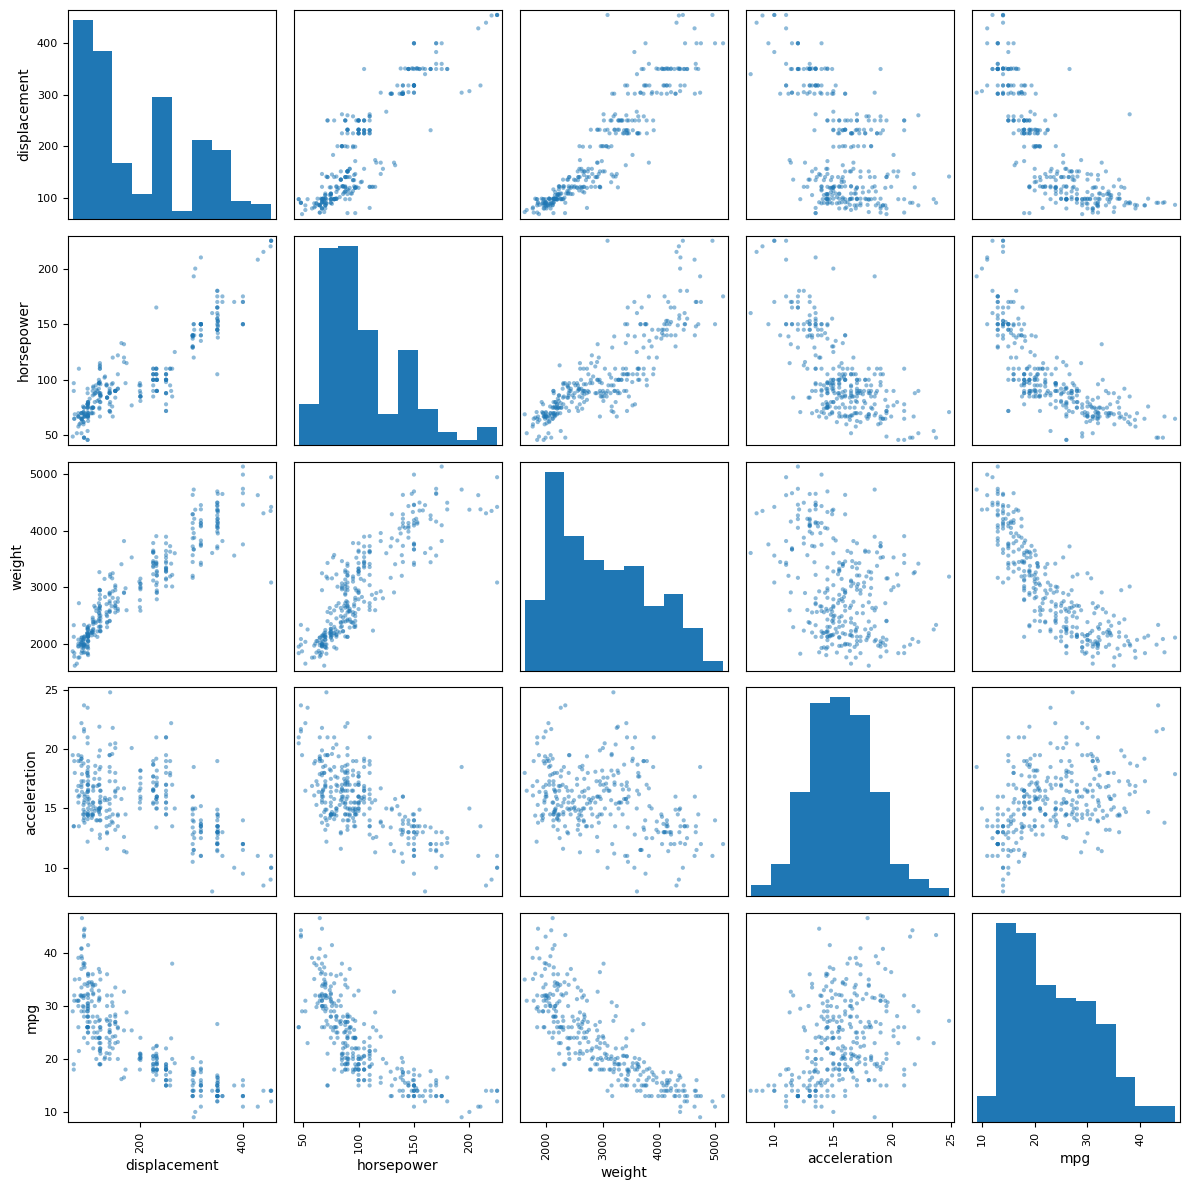

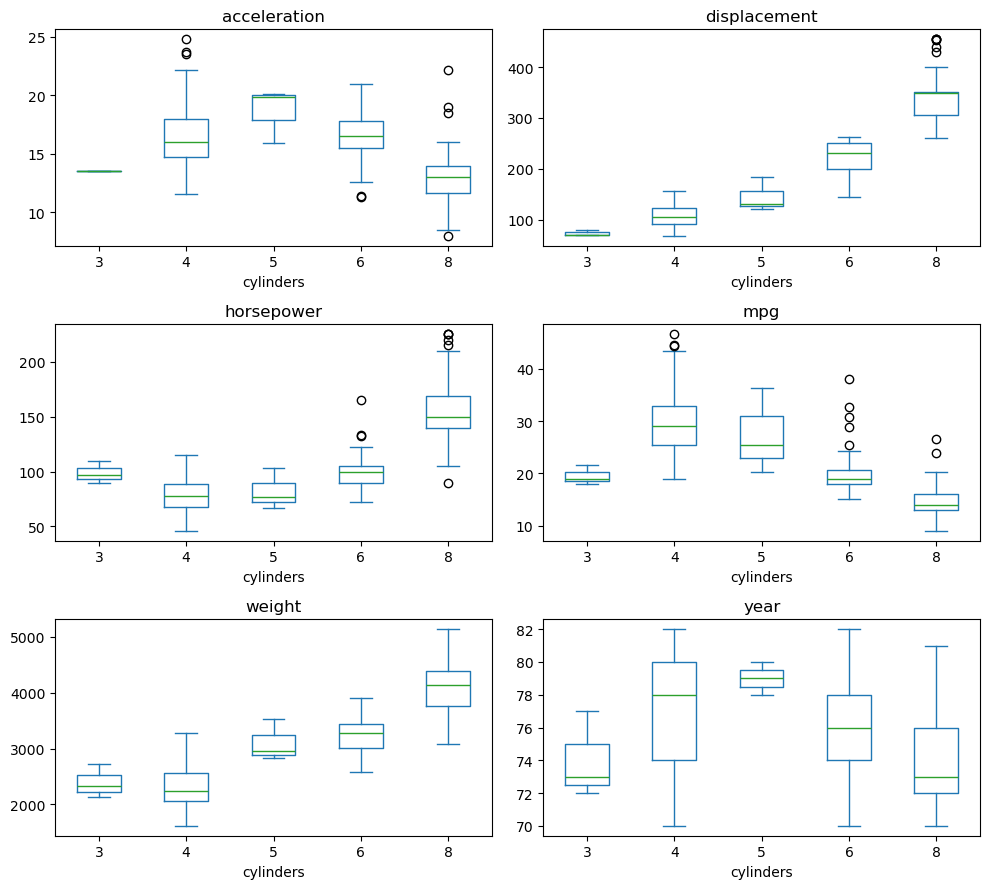

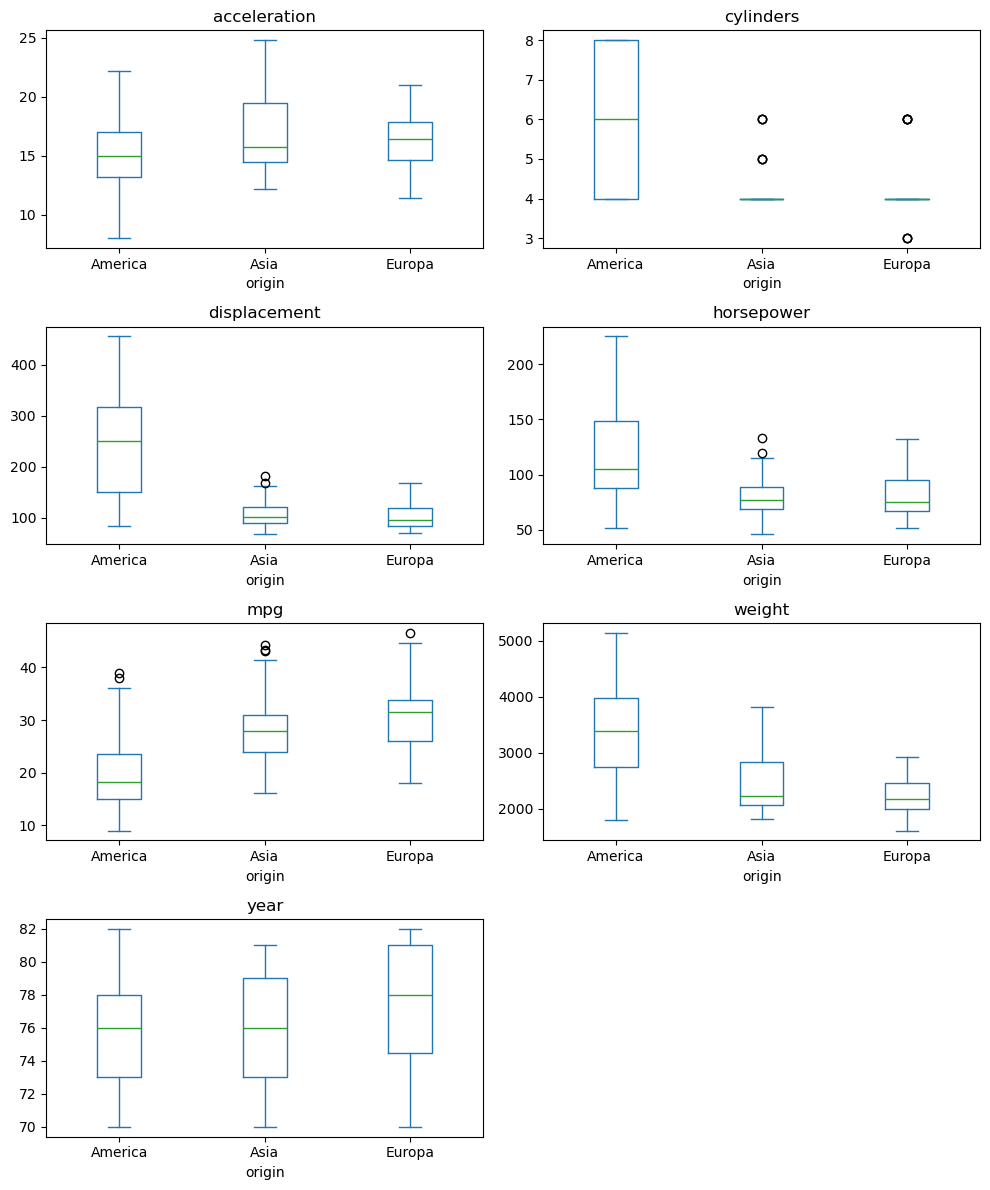

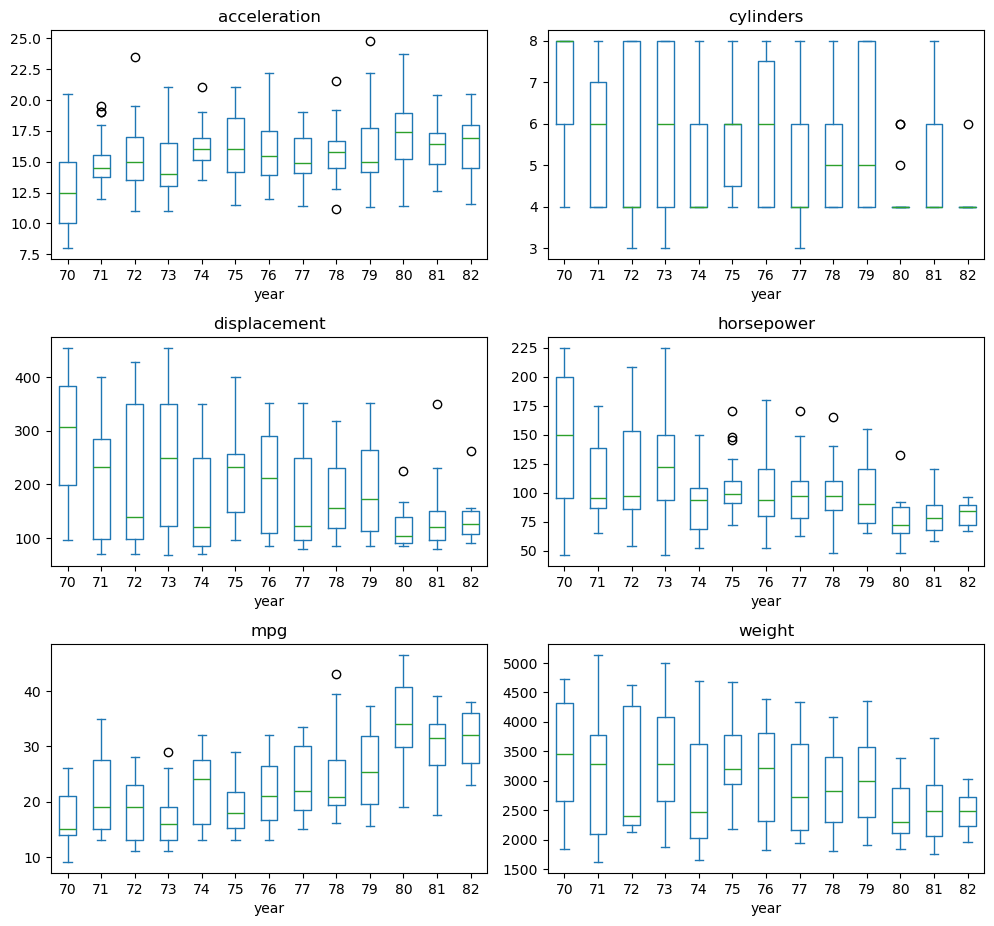

In [18]:
import warnings

def visualize(X_train, y_train):
    df_train = X_train.copy()
    df_train['mpg'] = y_train.copy()

    print('Estatísticas descritivas das variáveis contínuas')
    print(df_train.describe(include=np.number).transpose())
    print()

    print('Estatísticas descritivas das variáveis categóricas')
    print(df_train.describe(include='category').transpose())
    print()

    df_train_numericals = df_train.drop(
        columns=['origin', 'cylinders', 'year'])

    print('Correlações entre as variáveis numéricas')
    print(df_train_numericals.corr())
    print()

    print('Visualizações')

    pd.plotting.scatter_matrix(df_train_numericals, figsize=(12, 12))
    plt.tight_layout()
    plt.show()

    with warnings.catch_warnings(action='ignore', category=FutureWarning):
        df_train \
            .drop(columns=['origin']) \
            .plot \
            .box( \
                by='cylinders', \
                layout=(3, 2), \
                figsize=(10, 9), \
                xlabel='cylinders', \
            )
        plt.tight_layout()
        plt.show()

        df_train \
            .plot \
            .box(by='origin', layout=(4, 2), figsize=(10, 12), xlabel='origin')
        plt.tight_layout()
        plt.show()

        df_train \
            .plot \
            .box(by='year', layout=(4, 2), figsize=(10, 12), xlabel='year')
        plt.tight_layout()
        plt.show()


visualize(X_train, y_train)

# Prova intermediária

Ao longo das questões seguintes você vai construir um projeto de regressão.

### Questão 1: Modelo linear simples


a) (1,0 pt) Processe os dados de treinamento de modo a prepará-los para o uso em um modelo de regressão linear. Não enriqueça o modelo com *feature engineering* ainda, apenas corrija valores faltantes e codifique as variáveis categóricas conforme necessário. Não é obrigatório o uso de `Pipeline` ou `ColumnTransformer` - esteja livre para usá-los ou não, conforme preferir.

In [19]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 298 entries, 245 to 102
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   cylinders     298 non-null    int64   
 1   displacement  298 non-null    float64 
 2   horsepower    293 non-null    float64 
 3   weight        298 non-null    float64 
 4   acceleration  298 non-null    float64 
 5   year          298 non-null    int64   
 6   origin        298 non-null    category
dtypes: category(1), float64(4), int64(2)
memory usage: 16.7 KB


In [20]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

columns_num = [
    'cylinders',
    'displacement',
    'horsepower',
    'weight',
    'acceleration',
    'year',
]

columns_cat = ['origin']

pipe_num = Pipeline([
    ('impute', SimpleImputer()),
])

pipe_cat = Pipeline([
    ('onehot', OneHotEncoder(drop='first', sparse_output=False)),
])

pipe = ColumnTransformer([
    ('num', pipe_num, columns_num),
    ('cat', pipe_cat, columns_cat),
])

In [21]:
X_train_processed = pipe.fit_transform(X_train)

b) (1,0 pt) Analise o desempenho RMSE de um modelo de regressão linear usando validação cruzada com 10 partições. 

Dica: use a métrica `"neg_mean_squared_error"` no argumento `scoring` da função `cross_val_score`, e corrija adequadamente os escores obtidos.

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

model = LinearRegression()

result = cross_val_score(
    model,
    X_train_processed,
    y_train,
    cv=10,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
)

In [23]:
result = np.sqrt(-result)

In [24]:
result

array([2.87267296, 3.66618779, 2.23525396, 4.04476137, 3.68422735,
       4.1911107 , 2.52063728, 3.82295316, 3.78849919, 3.53623545])

In [25]:
np.mean(result), np.std(result)

(3.436253921452033, 0.627410396637192)

O modelo de regressão linear simples apresenta RMSE médio de 3.44, com desvio padrão de 0.63.


### Questão 2: Modelo linear com *feature engineering*


a) (1,0 pt) Refaça o processamento da questão 1, item a, mas agora incorpore os seguintes enriquecimentos de dados: 

- Features polinomiais de grau 2 (`PolynomialFeatures` no scikit-learn)
- Substitua a coluna `year` por uma coluna categórica chamada `status` (que deverá ser adequadamente representada para o modelo linear) com os seguintes valores:
    - "antes" se `year` menor ou igual ao ano de 1973
    - "entre" se `year` maior que o ano de 1973 e menor ou igual ao ano de 1979
    - "depois" se `year` maior que o ano de 1979
    
    Estes anos correspondem às crises do petróleo na década de 1970 (https://pt.wikipedia.org/wiki/Crises_do_petr%C3%B3leo)

### Resposta

1. Fazendo a codificação de ano separada da Pipeline

Nesta alternativa fazemos a codificação do ano em uma função que tem que ser chamada antes da Pipeline

In [26]:
# Codifica o ano.
def codifica_ano(X_train):
    X_train_year_encoded = X_train.copy()
    X_train_year_encoded['status'] = 'entre'
    X_train_year_encoded.loc[X_train_year_encoded['year'] <= 73, ['status']] = 'antes'
    X_train_year_encoded.loc[X_train_year_encoded['year'] > 79, ['status']] = 'depois'
    X_train_year_encoded = X_train_year_encoded.drop(columns='year')
    return X_train_year_encoded

X_train_year_encoded = codifica_ano(X_train)

In [27]:
X_train_year_encoded

,cylinders,displacement,horsepower,weight,acceleration,origin,status
245,4,98.0,66.0,1800.0,14.4,America,entre
110,4,108.0,94.0,2379.0,16.5,Asia,antes
16,6,199.0,97.0,2774.0,15.5,America,antes
66,8,304.0,150.0,3672.0,11.5,America,antes
153,6,250.0,105.0,3459.0,16.0,America,entre
...,...,...,...,...,...,...,...
71,3,70.0,97.0,2330.0,13.5,Asia,antes
106,8,350.0,180.0,4499.0,12.5,America,antes
270,4,134.0,95.0,2515.0,14.8,Asia,entre
348,4,89.0,62.0,2050.0,17.3,Asia,depois


In [28]:
columns_num_new = [
    'cylinders',
    'displacement',
    'horsepower',
    'weight',
    'acceleration',
]

columns_cat_new = columns_cat + ['status']
columns_cat_new

['origin', 'status']

In [29]:
from sklearn.preprocessing import PolynomialFeatures

pipe_num_new_1 = Pipeline([
    ('impute', SimpleImputer()),
    ('poly', PolynomialFeatures(degree=2)),
])

pipe_cat_new_1 = Pipeline([
    ('onehot', OneHotEncoder(drop='first', sparse_output=False)),
])

pipe_new_1 = ColumnTransformer([
    ('num', pipe_num_new_1, columns_num_new),
    ('cat', pipe_cat_new_1, columns_cat_new),
])

In [30]:
X_train_year_encoded_processed = pipe_new_1.fit_transform(X_train_year_encoded)

In [31]:
X_train_year_encoded_processed.shape

(298, 25)

2. Fazer um transformador que faz a codificação do ano, e incorporá-lo na Pipeline

In [32]:
from sklearn.base import BaseEstimator, TransformerMixin

class CodificaAno(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_year_encoded = X.copy()
        X_year_encoded['status'] = 'entre'
        X_year_encoded.loc[X_year_encoded['year'] <= 73, ['status']] = 'antes'
        X_year_encoded.loc[X_year_encoded['year'] > 79, ['status']] = 'depois'
        X_year_encoded = X_year_encoded.drop(columns='year')
        return X_year_encoded

In [33]:
from sklearn.preprocessing import PolynomialFeatures

pipe_num_new_2 = Pipeline([
    ('impute', SimpleImputer()),
    ('poly', PolynomialFeatures(degree=2)),
])

pipe_cat_new_2 = Pipeline([
    ('onehot', OneHotEncoder(drop='first', sparse_output=False)),
])

pipe_new_2 = Pipeline([
    ('codifica_ano', CodificaAno()),
    ('preprocess', ColumnTransformer([
        ('num', pipe_num_new_2, columns_num_new),
        ('cat', pipe_cat_new_2, columns_cat_new),
    ])),
])

X_train_year_encoded_processed = pipe_new_2.fit_transform(X_train)

b) (1,0 pt) Assim como na questão 1, item b, analise o desempenho RMSE de um modelo de regressão linear usando validação cruzada com 10 partições. 

Dica: use a métrica `"neg_mean_squared_error"` no argumento `scoring` da função `cross_val_score`, e corrija adequadamente os escores obtidos.

In [34]:
model_new = LinearRegression()

result_new = cross_val_score(
    model_new,
    X_train_year_encoded_processed,
    y_train,
    cv=10,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
)

In [35]:
result_new = np.sqrt(-result_new)

In [36]:
result_new

array([2.73234333, 3.15503564, 2.75688395, 3.16356781, 3.56562466,
       4.21177478, 2.30447128, 3.41042514, 2.40939086, 2.65799342])

In [37]:
np.mean(result_new), np.std(result_new)

(3.0367510869987564, 0.5544687179252695)

O modelo de regressão linear polinomial apresenta RMSE médio de 3.04, com desvio padrão de 0.55.


### Questão 3: Escolha de modelo e análise final

a) (1,0 pt) Compare os dois modelos investigados nas questões anteriores. Existe evidência de que o modelo mais complexo é melhor que o modelo simples?

In [38]:
from scipy.stats import ttest_ind

ttest_ind(result, result_new, equal_var=True)

TtestResult(statistic=1.4313885121054515, pvalue=0.1694533520942272, df=18.0)

O teste de hipoteses não permite rejeitar a hipotese nula, portanto não podemos afirmar, com significância de 5%, que os modelos tem desempenho médio diferente.

b) (1,0 pt) Retreine o modelo escolhido (se não houver evidencia de superioridade de um modelo sobre o outro, escolha o que você quiser) no conjunto de treinamento completo e meça o desempenho final no conjunto de teste. (O modelo continua sendo uma regressão linear, o que muda é o uso do conjunto de treinamento original ou o com *feature engineering*)

In [39]:
model_new.fit(X_train_year_encoded_processed, y_train)

LinearRegression()

In [40]:
# Preprocessando os dados de teste, alternativa 1. Pode usar a alternativa 2 tambem
X_test_year_encoded = codifica_ano(X_test)
X_test_year_encoded_processed = pipe_new_1.transform(X_test_year_encoded)

In [41]:
y_pred = model_new.predict(X_test_year_encoded_processed)

In [42]:
from sklearn.metrics import mean_squared_error

final_result = np.sqrt(mean_squared_error(y_test, y_pred))
final_result

2.6028109363476237

c) (1,0 pt) Visualize o histograma dos resíduos (diferença entre os valores preditos e valores reais) obtidos no conjunto de teste. Este modelo tem alguma tendência de errar para cima ou para baixo?

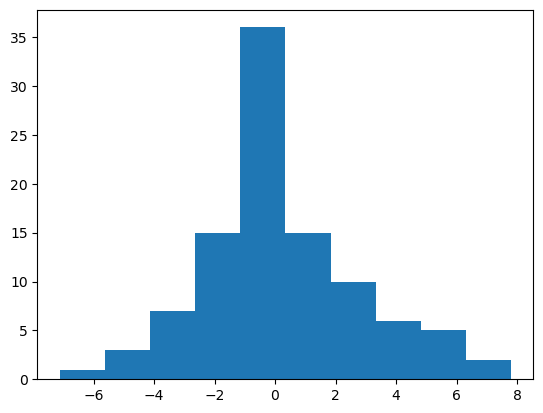

In [43]:
residuos = y_pred - y_test

plt.hist(residuos)
plt.show()

In [44]:
(residuos <= 0).sum(), (residuos >= 0).sum(), 

(56, 44)

In [45]:
residuos.describe()

count    100.000000
mean       0.203781
std        2.607894
min       -7.107908
25%       -1.306747
50%       -0.207362
75%        1.490755
max        7.797965
Name: mpg, dtype: float64

### Questão 4: Parte conceitual

a) (1,0 pt) Perguntei ao "ChatGPT" o seguinte: "No contexto de machine learning, explique com suas palavras e em menos de 100 palavras os conceitos de precision e recall.". A resposta foi:

"Precision e recall são métricas de avaliação usadas em machine learning para medir o desempenho de modelos de classificação. Precision mede a proporção de verdadeiros positivos em relação ao total de exemplos classificados como positivos, enfocando a precisão das predições positivas. Recall mede a proporção de verdadeiros positivos em relação ao total de exemplos verdadeiramente positivos, enfocando a capacidade do modelo de identificar corretamente todos os casos positivos. Em resumo, precision mede a precisão das predições positivas, enquanto recall mede a capacidade de um modelo encontrar todos os casos positivos. Ambas as métricas são importantes e podem ser ajustadas para atender às necessidades específicas do problema."

Construa um exemplo do seu cotidiano como aluno do Insper em que o trade-off precision versus recall poderia ser demonstrado. Você não deve incluir exemplos de projetos ou aplicativos de machine learning, ou provas academicas em geral.

Resposta:

b) (1,0 pt) Explique para o seu professor de matemática do colegial o que é o algoritmo *gradient descent* e o que acontece quando usamos este algoritmo com taxa de aprendizado muito grande.

Resposta:

c) (1,0 pt) Construa um exemplo concreto de como o machine learning pode ajudar a melhorar a qualidade de vida da população de rua em São Paulo. O exemplo deve ser específico de machine learning, e não de inteligência artificial no sentido mais amplo.

Resposta: